
Description: You are given a dataset of patients to be tested for heart disease. are given below.
• age
• sex – Male, Female
• cp - chest pain type (4 values)
• trestbps - resting blood pressure
• chol - serum cholestoral in mg/dl
• fbs - fasting blood sugar > 120 mg/dl
• restecg - resting electrocardiographic results, values: 0,1,2
• thalach - maximum heart rate achieved
• exang - exercise induced angina
• oldpeak - ST depression induced by exercise relative to rest
• slope - the slope of the peak exercise ST segment
• ca - number of major vessels colored by flourosopy, values: 0,1,2,3,4 • thal - values: 0,1,2,3
• target – is the column we want to predict.
Features
You asked to create Support Vector Machine (with both Linear and RBF kernel) classifier, Decision Tree classifier, Random Forest classifier, Logistic Regression, Naïve Bayes classifier, KNN classifier to predict whether patients have heart disease or not and decide which algorithm performs the best on average.

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline 
# for not to use plt.show(), just see plots right now

from warnings import filterwarnings
filterwarnings('ignore')
# to not show this red colored warnings

In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
# here in some lines the difference between mean and std is big so need to do scaling after train_test_split

In [11]:
df_corr=df.corr().abs().unstack().sort_values(ascending = False)
df_corr

age      age        1.000000
sex      sex        1.000000
thal     thal       1.000000
ca       ca         1.000000
slope    slope      1.000000
                      ...   
fbs      thalach    0.008567
         oldpeak    0.005747
oldpeak  fbs        0.005747
chol     slope      0.004038
slope    chol       0.004038
Length: 196, dtype: float64

In [15]:
df_corr[((df_corr > 0.6) & (df_corr != 1))] # check correlation to see where corr is too much high, there were no correlation coefficient higher than 0,6, so no need to worry about multicolinearity

Series([], dtype: float64)

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

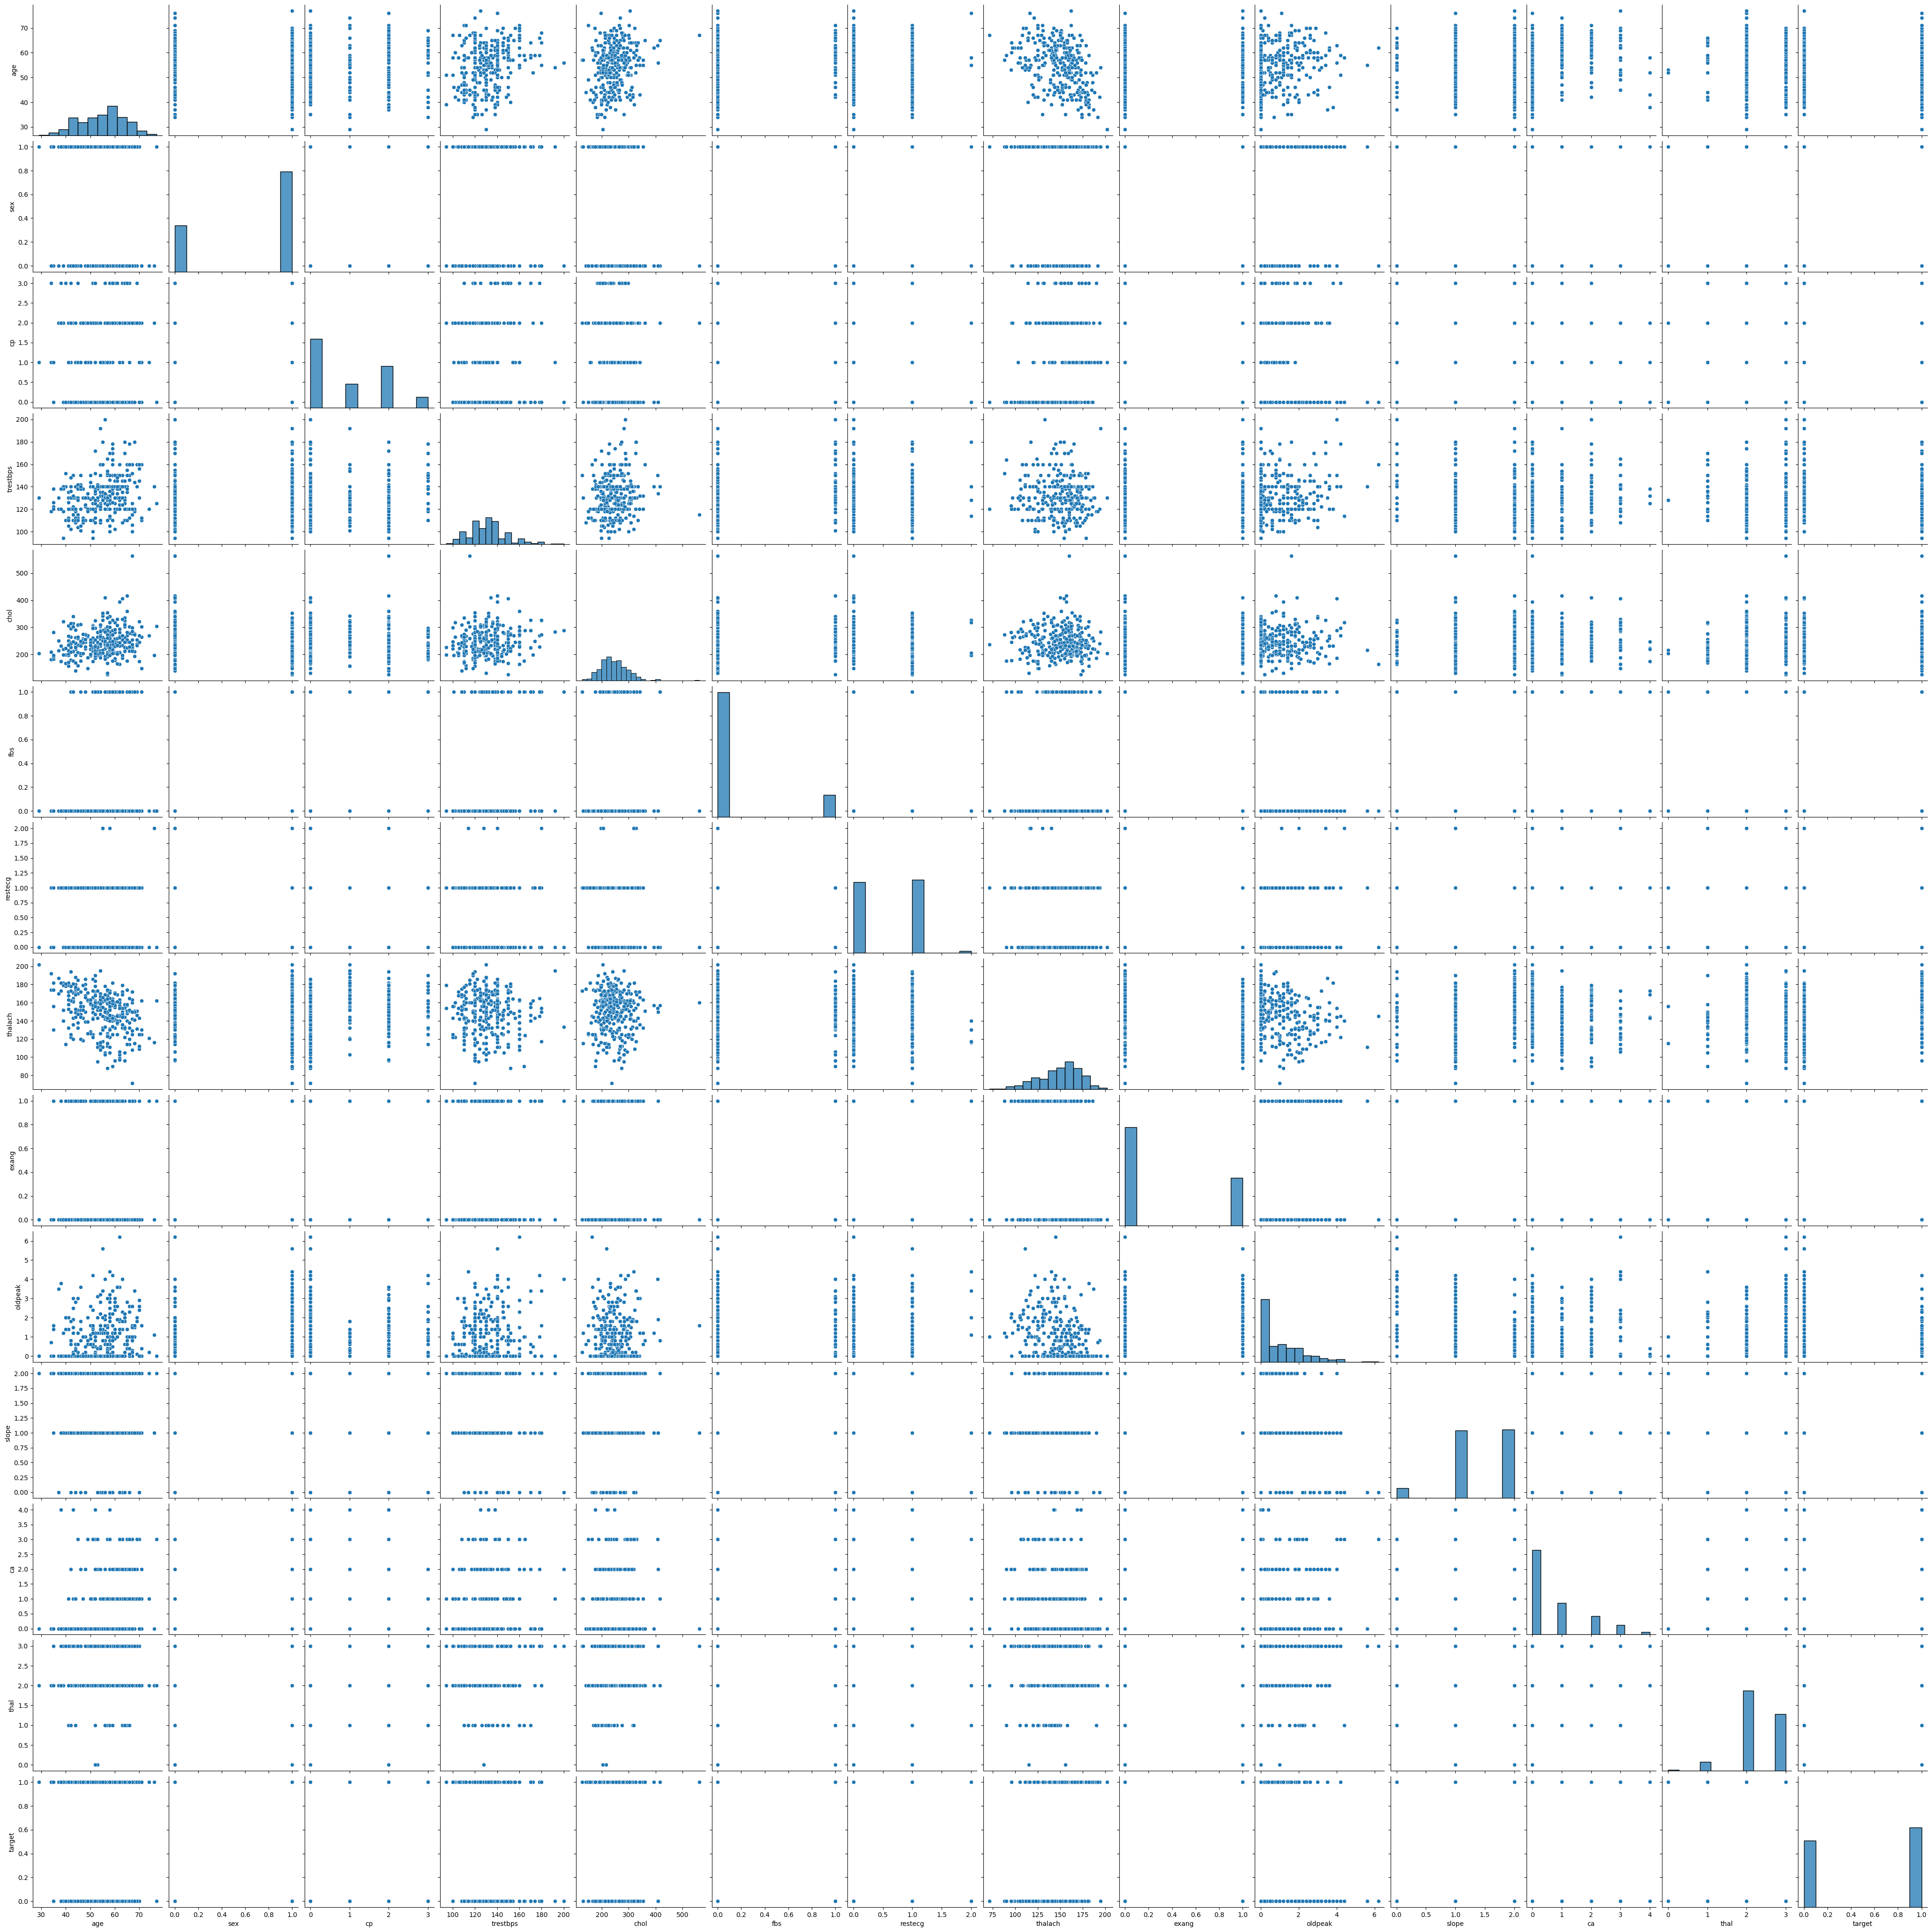

In [17]:
 sns.pairplot(df,  height=3) 

In [ ]:
# on this plot, while analysing histogramms for cp and thal , we see there are 4 columns ,
#it doesn't look like normal distribution,so actual they could be  categorical values, just encoded with label encoder,
# which can be not correct , because we are not sure about what is cp and thal -  That is teacher's logic at case study, 
# so next I'll show how we change types of this features and apply oneHotEncoder to them, like we made at class 
### Buuut I actually not sure if this step is necessary, I search in the internet and find that 'thal' means thalassemia - the blood disease, 
# and there are types of this disease depending on the severity of the thalassemia.
# From this point of view 0,1,2,3 makes more sense (grade 3 disease more severe than 0, they are not equal for using onehotencoding).
# 'Cp' (as we can see in case study's pdf) is chest pain type,
#so the same logic : a patient of degree 3 feels more pain than 0, again 3 not equal 0  for using onehotencoding.

In [18]:
df[['cp','thal']]=df[['cp','thal']].astype(object)
df1=df[['cp','thal']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cp      303 non-null    object
 1   thal    303 non-null    object
dtypes: object(2)
memory usage: 4.9+ KB


In [19]:
df1=pd.get_dummies(df1, drop_first=True)
df1=df1.astype(int)

In [20]:
df2=df.drop(df.select_dtypes(include=['object']).columns, axis=1)
df2

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,145,233,1,0,150,0,2.3,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,1
2,41,0,130,204,0,0,172,0,1.4,2,0,1
3,56,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,110,264,0,1,132,0,1.2,1,0,0
300,68,1,144,193,1,1,141,0,3.4,1,2,0
301,57,1,130,131,0,1,115,1,1.2,1,1,0


In [21]:
df_final=pd.concat([df2,df1], axis=1)
df_final

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,1,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,1,1,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,1,1,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,1,132,0,1.2,1,0,0,0,0,1,0,0,1
300,68,1,144,193,1,1,141,0,3.4,1,2,0,0,0,0,0,0,1
301,57,1,130,131,0,1,115,1,1.2,1,1,0,0,0,0,0,0,1


# Train test split

In [23]:
from sklearn.model_selection import train_test_split
y=df_final['target'].values
X=df_final.drop('target',axis=1)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42)  
# stratify=y breaks down more balanced layers of information

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 17), (76, 17), (227,), (76,))

# Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
X_train_scaled

array([[ 0.26745345,  0.71647284,  1.40362838, ..., -0.24647041,
         0.89531408, -0.78830741],
       [ 0.4831264 ,  0.71647284, -0.24391769, ...,  4.05728215,
        -1.11692648, -0.78830741],
       [ 1.34581817,  0.71647284, -0.30275862, ..., -0.24647041,
        -1.11692648,  1.26854066],
       ...,
       [ 1.56149112,  0.71647284,  1.75667397, ..., -0.24647041,
         0.89531408, -0.78830741],
       [-0.91874774,  0.71647284, -0.59696328, ..., -0.24647041,
        -1.11692648,  1.26854066],
       [ 0.91447229, -1.39572632,  0.57985534, ..., -0.24647041,
         0.89531408, -0.78830741]])

# Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression as LogReg
classifier=LogReg (random_state=42)
logistic_model=classifier.fit(X_train_scaled,y_train)
y_pred_logistic=logistic_model.predict(X_test_scaled)
y_pred_logistic
# for p>0,5 1 , p<0,5 0

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [28]:
y_pred_logistic_proba=logistic_model.predict_proba(X_test_scaled)
y_pred_logistic_proba

array([[9.49208749e-01, 5.07912509e-02],
       [4.81999558e-01, 5.18000442e-01],
       [1.44898321e-01, 8.55101679e-01],
       [9.86977934e-01, 1.30220663e-02],
       [3.30772394e-02, 9.66922761e-01],
       [4.18371943e-02, 9.58162806e-01],
       [4.27197767e-01, 5.72802233e-01],
       [9.98840250e-01, 1.15975038e-03],
       [9.90633281e-01, 9.36671920e-03],
       [3.87479716e-01, 6.12520284e-01],
       [3.33898491e-01, 6.66101509e-01],
       [9.54333316e-01, 4.56666840e-02],
       [7.21702758e-02, 9.27829724e-01],
       [9.68371849e-01, 3.16281511e-02],
       [1.46862005e-02, 9.85313800e-01],
       [3.65125110e-02, 9.63487489e-01],
       [1.97534682e-02, 9.80246532e-01],
       [9.10390109e-01, 8.96098912e-02],
       [9.92766347e-01, 7.23365291e-03],
       [9.77958428e-01, 2.20415721e-02],
       [5.13021138e-01, 4.86978862e-01],
       [9.87013536e-01, 1.29864645e-02],
       [5.92698380e-01, 4.07301620e-01],
       [2.25323399e-01, 7.74676601e-01],
       [3.876653

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score, precision_score, roc_auc_score
cm_logistic=confusion_matrix(y_test,y_pred_logistic)
print('Confusion Matrix\n\n', cm_logistic)

print(accuracy_score(y_test, y_pred_logistic))
print(precision_score(y_test, y_pred_logistic))
print(recall_score(y_test, y_pred_logistic))
print(f1_score(y_test, y_pred_logistic))
print(roc_auc_score(y_test, y_pred_logistic))

Confusion Matrix

 [[29  6]
 [ 4 37]]
0.868421052631579
0.8604651162790697
0.9024390243902439
0.8809523809523809
0.865505226480836


In [30]:
from sklearn.model_selection import cross_validate
accuracies= cross_validate( estimator = logistic_model, X=X_train_scaled, y=y_train, cv=4, scoring=['f1', 'roc_auc', 'recall'])
accuracies

{'fit_time': array([0.00545001, 0.00409794, 0.00307012, 0.00195408]),
 'score_time': array([0.00472999, 0.00340796, 0.002388  , 0.00246477]),
 'test_f1': array([0.81967213, 0.79365079, 0.85294118, 0.85245902]),
 'test_roc_auc': array([0.8560794 , 0.88585608, 0.89205955, 0.92903226]),
 'test_recall': array([0.80645161, 0.80645161, 0.93548387, 0.83870968])}

In [31]:
accuracies['test_f1'].mean()

0.8296807794155914

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=7, metric='euclidean')
KNN_model=classifier.fit(X_train_scaled, y_train)
y_pred_KNN=KNN_model.predict(X_test_scaled)

In [33]:
cm_KNN=confusion_matrix(y_test,y_pred_KNN)
print('Confusion Matrix\n\n', cm_KNN)

print(accuracy_score(y_test, y_pred_KNN))
print(precision_score(y_test, y_pred_KNN))
print(recall_score(y_test, y_pred_KNN))
print(f1_score(y_test, y_pred_KNN))
print(roc_auc_score(y_test, y_pred_KNN))

Confusion Matrix

 [[28  7]
 [ 5 36]]
0.8421052631578947
0.8372093023255814
0.8780487804878049
0.8571428571428572
0.8390243902439024


In [34]:
from sklearn.model_selection import cross_validate
accuracies= cross_validate( estimator = KNN_model, X=X_train_scaled, y=y_train, cv=4, scoring=['f1', 'roc_auc', 'recall'])
accuracies

{'fit_time': array([0.00167704, 0.0003581 , 0.00033569, 0.00028205]),
 'score_time': array([0.01375794, 0.00894499, 0.00872827, 0.0079751 ]),
 'test_f1': array([0.82758621, 0.8       , 0.8125    , 0.84745763]),
 'test_roc_auc': array([0.87717122, 0.87903226, 0.89143921, 0.93290323]),
 'test_recall': array([0.77419355, 0.83870968, 0.83870968, 0.80645161])}

In [35]:
accuracies['test_roc_auc'].mean()

0.895136476426799

# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
NB_model=classifier.fit(X_train_scaled, y_train)
y_pred_NB=NB_model.predict(X_test_scaled)

In [37]:
cm_NB=confusion_matrix(y_test,y_pred_NB)
print('Confusion Matrix\n\n', cm_NB)

print(accuracy_score(y_test, y_pred_NB))
print(precision_score(y_test, y_pred_NB))
print(recall_score(y_test, y_pred_NB))
print(f1_score(y_test, y_pred_NB))
print(roc_auc_score(y_test, y_pred_NB))

Confusion Matrix

 [[30  5]
 [ 5 36]]
0.868421052631579
0.8780487804878049
0.8780487804878049
0.8780487804878049
0.8675958188153311


# SVM

In [38]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf', probability=True, random_state=42)
SVM_model=classifier.fit(X_train_scaled, y_train)
y_pred_SVM=SVM_model.predict(X_test_scaled)

In [39]:
cm_SVM=confusion_matrix(y_test,y_pred_SVM)
print('Confusion Matrix\n\n', cm_SVM)

print(accuracy_score(y_test, y_pred_SVM))
print(precision_score(y_test, y_pred_SVM))
print(recall_score(y_test, y_pred_SVM))
print(f1_score(y_test, y_pred_SVM))
print(roc_auc_score(y_test, y_pred_SVM))

Confusion Matrix

 [[29  6]
 [ 6 35]]
0.8421052631578947
0.8536585365853658
0.8536585365853658
0.8536585365853658
0.841114982578397


In [40]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear', probability=True, random_state=42)
SVM_model=classifier.fit(X_train_scaled, y_train)
y_pred_SVM=SVM_model.predict(X_test_scaled)

In [41]:
cm_SVM=confusion_matrix(y_test,y_pred_SVM)
print('Confusion Matrix\n\n', cm_SVM)

print(accuracy_score(y_test, y_pred_SVM))
print(precision_score(y_test, y_pred_SVM))
print(recall_score(y_test, y_pred_SVM))
print(f1_score(y_test, y_pred_SVM))
print(roc_auc_score(y_test, y_pred_SVM))

Confusion Matrix

 [[29  6]
 [ 4 37]]
0.868421052631579
0.8604651162790697
0.9024390243902439
0.8809523809523809
0.865505226480836


# Decision tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy', random_state=42)
DT_model=classifier.fit(X_train_scaled, y_train)
y_pred_DT=DT_model.predict(X_test_scaled)

In [43]:
cm_DT=confusion_matrix(y_test,y_pred_DT)
print('Confusion Matrix\n\n', cm_DT)

print(accuracy_score(y_test, y_pred_DT))
print(precision_score(y_test, y_pred_DT))
print(recall_score(y_test, y_pred_DT))
print(f1_score(y_test, y_pred_DT))
print(roc_auc_score(y_test, y_pred_DT))

Confusion Matrix

 [[27  8]
 [12 29]]
0.7368421052631579
0.7837837837837838
0.7073170731707317
0.7435897435897435
0.7393728222996516


In [44]:
from sklearn.model_selection import cross_validate
accuracies= cross_validate( estimator = DT_model, X=X_train_scaled, y=y_train, cv=4, scoring=['f1', 'roc_auc', 'recall'])
accuracies

{'fit_time': array([0.00196886, 0.00174785, 0.00179482, 0.00180817]),
 'score_time': array([0.00401831, 0.00494695, 0.00365305, 0.00283384]),
 'test_f1': array([0.72131148, 0.79411765, 0.67692308, 0.78571429]),
 'test_roc_auc': array([0.70099256, 0.74317618, 0.62406948, 0.79483871]),
 'test_recall': array([0.70967742, 0.87096774, 0.70967742, 0.70967742])}

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier (n_estimators=40, criterion='entropy', random_state=42)
RF_model=classifier.fit(X_train_scaled, y_train)
y_pred_RF=RF_model.predict(X_test_scaled)

In [46]:
cm_RF=confusion_matrix(y_test,y_pred_RF)
print('Confusion Matrix\n\n', cm_RF)

print(accuracy_score(y_test, y_pred_RF))
print(precision_score(y_test, y_pred_RF))
print(recall_score(y_test, y_pred_RF))
print(f1_score(y_test, y_pred_RF))
print(roc_auc_score(y_test, y_pred_RF))

Confusion Matrix

 [[28  7]
 [ 8 33]]
0.8026315789473685
0.825
0.8048780487804879
0.8148148148148149
0.802439024390244


In [48]:
from sklearn.model_selection import cross_validate
accuracies= cross_validate( estimator = RF_model, X=X_train_scaled, y=y_train, cv=4, scoring=['f1', 'roc_auc', 'recall'])
accuracies

{'fit_time': array([0.04814911, 0.03009701, 0.02961779, 0.02966619]),
 'score_time': array([0.00529718, 0.00445294, 0.00451922, 0.00447178]),
 'test_f1': array([0.82142857, 0.83870968, 0.83076923, 0.86206897]),
 'test_roc_auc': array([0.9057072 , 0.87779156, 0.91066998, 0.94387097]),
 'test_recall': array([0.74193548, 0.83870968, 0.87096774, 0.80645161])}

In [ ]:
# The best result logistic regression shows, and the worst tree methods ( too complicated for such small data)